![](../../logo.png)

# Physics Informed Neural Networks in Astrophysics

---

### Alexis Larrañaga - 2024
ealarranaga@unal.edu.co

---

## Solution of a PDE (One-dimensional Linear Advection Equation)

Continuity equation $\frac{\partial \rho}{\partial t} + \vec{\nabla} \cdot \left( \rho \vec{u}\right) = 0$   ￼

For a one-dimensional system and assuming a constant propagation velocity, we obtain the linear advection equation:
$$
\frac{\partial \rho}{\partial t} + u_x \frac{\partial \rho}{\partial x} = 0
$$

We consider the initial condition
$$
 \rho(t=0,x) = \rho_o(x) = \cos (\pi x)
 $$
and periodic spatial boundaries. We will solve in the time interval $t\in [0,1]$ in the spatial domain $x\in [-1,1]$.

The analytical solution of this problem is given by:  $u(t,x) = \cos\pi(x-t)$￼ 

In [1]:
import pinnde.pde_Solvers as pde_Solvers
import pinnde.pde_Initials as pde_Initials
import pinnde.pde_Boundaries_2var as pde_Boundaries_2var
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

u0 = lambda x: tf.cos(np.pi*x)
t_bdry = [0,1]
x_bdry = [-1,1]
t_order = 1
N_iv = 100
initials = pde_Initials.setup_initials_2var(t_bdry, x_bdry, t_order, [u0], N_iv)

boundaries = pde_Boundaries_2var.setup_boundaries_periodic_tx(t_bdry, x_bdry)

eqn = "ut+ux"
N_pde = 10000
epochs = 1200

mymodel = pde_Solvers.solvePDE_tx(eqn, initials, boundaries, N_pde)
mymodel.train_model(epochs)

mymodel.plot_epoch_loss('epoch_loss.png')

mymodel.plot_solution_prediction('solution.png')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalize_1         │ (None, 1)         │          0 │ input_layer[0][0] │
│ (Normalize)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ periodic (Periodic) │ (None, 2)         │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 3)         │          0 │ normalize_1[0][0… │
│ (Concatenate)       │                   │            │ periodic[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 60)        │        240 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 60)        │      3,660 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 60)        │      3,660 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 60)        │      3,660 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         61 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,281 (88.13 KB)

 Trainable params: 11,281 (88.13 KB)

 Non-trainable params: 0 (0.00 B)

PDE loss, IV loss in 0th epoch:  0.0301,  0.5308.
PDE loss, IV loss in 100th epoch:  0.0014,  0.0001.
PDE loss, IV loss in 200th epoch:  0.0006,  0.0000.
PDE loss, IV loss in 300th epoch:  0.0003,  0.0000.
PDE loss, IV loss in 400th epoch:  0.0002,  0.0000.
PDE loss, IV loss in 500th epoch:  0.0002,  0.0000.
PDE loss, IV loss in 600th epoch:  0.0002,  0.0000.
PDE loss, IV loss in 700th epoch:  0.0002,  0.0000.
PDE loss, IV loss in 800th epoch:  0.0001,  0.0000.
PDE loss, IV loss in 900th epoch:  0.0001,  0.0000.
PDE loss, IV loss in 1000th epoch:  0.0001,  0.0000.
PDE loss, IV loss in 1100th epoch:  0.0001,  0.0000.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

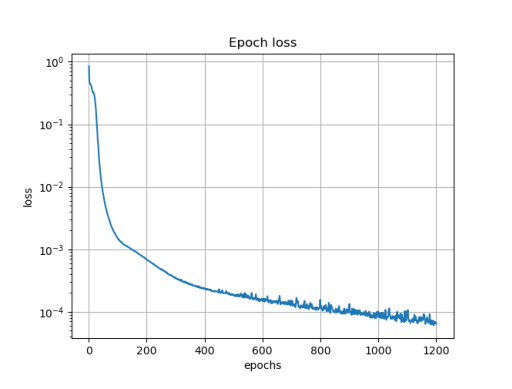

In [2]:
plt.imshow(mpimg.imread('epoch_loss.png'))
plt.axis('off')
plt.show()

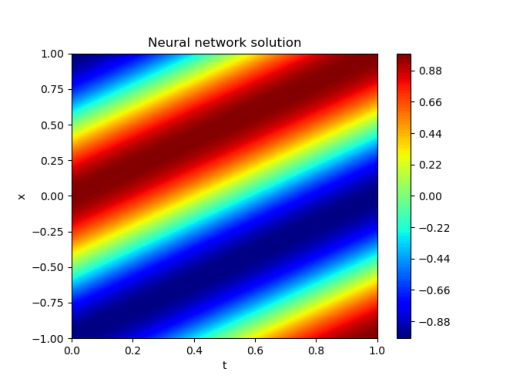

In [3]:
plt.imshow(mpimg.imread('solution.png'))
plt.axis('off')
plt.show()